In [1]:
# Import the dependncies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

628

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f042a66e4fc943f36e6796902f729a9c


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | huarmey
Processing Record 2 of Set 1 | tura
Processing Record 3 of Set 1 | kurilsk
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | norman wells
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | nerja
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | saint anthony
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | amga
Processing Record 15 of Set 1 | bitkine
Processing Record 16 of Set 1 | quatre cocos
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | havelock
Processing Record 19 of Set 1 | poum
Processing Record 20 of Set 1 | taoudenni
Processing Record 21 of Set 1 | new norfolk
Processing Record 22 of Set 1 | pevek
Processing Record 23 of Set 1 | klaksvik
Processing Re

Processing Record 40 of Set 4 | tiksi
Processing Record 41 of Set 4 | boueni
Processing Record 42 of Set 4 | galesong
Processing Record 43 of Set 4 | karasjok
Processing Record 44 of Set 4 | fayaoue
Processing Record 45 of Set 4 | plettenberg bay
Processing Record 46 of Set 4 | lorengau
Processing Record 47 of Set 4 | puerto boyaca
Processing Record 48 of Set 4 | bonanza
Processing Record 49 of Set 4 | sitka
Processing Record 50 of Set 4 | aflu
City not found. Skipping...
Processing Record 1 of Set 5 | swan hill
Processing Record 2 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 3 of Set 5 | kopayhorod
Processing Record 4 of Set 5 | upernavik
Processing Record 5 of Set 5 | russell
Processing Record 6 of Set 5 | port-gentil
Processing Record 7 of Set 5 | tual
Processing Record 8 of Set 5 | makakilo city
Processing Record 9 of Set 5 | qaanaaq
Processing Record 10 of Set 5 | arraial do cabo
Processing Record 11 of Set 5 | marathon
Processing Record 12 of Set 5 | moteg

Processing Record 25 of Set 8 | santa rosa
Processing Record 26 of Set 8 | viligili
City not found. Skipping...
Processing Record 27 of Set 8 | mana
Processing Record 28 of Set 8 | nioro
Processing Record 29 of Set 8 | raudeberg
Processing Record 30 of Set 8 | beyneu
Processing Record 31 of Set 8 | sao gabriel da cachoeira
Processing Record 32 of Set 8 | coihaique
Processing Record 33 of Set 8 | iberia
Processing Record 34 of Set 8 | saint-leu
Processing Record 35 of Set 8 | cayenne
Processing Record 36 of Set 8 | mikhaylovka
Processing Record 37 of Set 8 | purpe
Processing Record 38 of Set 8 | potsdam
Processing Record 39 of Set 8 | sataua
City not found. Skipping...
Processing Record 40 of Set 8 | emerald
Processing Record 41 of Set 8 | landsberg
Processing Record 42 of Set 8 | verkhnyaya inta
Processing Record 43 of Set 8 | maldonado
Processing Record 44 of Set 8 | sawtell
Processing Record 45 of Set 8 | caravelas
Processing Record 46 of Set 8 | midlothian
Processing Record 47 of Se

Processing Record 12 of Set 12 | sinnamary
Processing Record 13 of Set 12 | ye
City not found. Skipping...
Processing Record 14 of Set 12 | miraflores
Processing Record 15 of Set 12 | basco
Processing Record 16 of Set 12 | poya
Processing Record 17 of Set 12 | sobolevo
Processing Record 18 of Set 12 | olbia
Processing Record 19 of Set 12 | vondrozo
Processing Record 20 of Set 12 | port moresby
Processing Record 21 of Set 12 | raga
Processing Record 22 of Set 12 | bemidji
Processing Record 23 of Set 12 | ferndale
Processing Record 24 of Set 12 | vardo
Processing Record 25 of Set 12 | krasnoselkup
Processing Record 26 of Set 12 | conway
Processing Record 27 of Set 12 | hamilton
Processing Record 28 of Set 12 | zhanatas
City not found. Skipping...
Processing Record 29 of Set 12 | arlit
Processing Record 30 of Set 12 | rabinal
Processing Record 31 of Set 12 | platteville
Processing Record 32 of Set 12 | orlik
Processing Record 33 of Set 12 | san antonio
Processing Record 34 of Set 12 | may

In [9]:
len(city_data)

570

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Huarmey,-10.07,-78.15,72.48,67,54,7.74,PE,2020-05-28 18:12:02
1,Tura,25.52,90.22,71.76,92,3,4.41,IN,2020-05-28 18:14:15
2,Kurilsk,45.23,147.88,37.92,90,64,8.46,RU,2020-05-28 18:14:45
3,Busselton,-33.65,115.33,61.00,72,16,19.75,AU,2020-05-28 18:11:33
4,Norman Wells,65.28,-126.83,51.80,40,5,10.29,CA,2020-05-28 18:11:53
5,Yellowknife,62.46,-114.35,44.60,42,20,6.93,CA,2020-05-28 18:11:35
6,Punta Arenas,-53.15,-70.92,42.01,69,98,9.17,CL,2020-05-28 18:11:33
7,Rikitea,-23.12,-134.97,76.62,85,65,8.59,PF,2020-05-28 18:11:23
8,Avarua,-21.21,-159.78,77.00,88,79,11.41,CK,2020-05-28 18:07:57
9,Nerja,36.76,-3.89,73.00,68,0,1.01,ES,2020-05-28 18:14:46


In [11]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", 
                    "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Huarmey,PE,2020-05-28 18:12:02,-10.07,-78.15,72.48,67,54,7.74
1,Tura,IN,2020-05-28 18:14:15,25.52,90.22,71.76,92,3,4.41
2,Kurilsk,RU,2020-05-28 18:14:45,45.23,147.88,37.92,90,64,8.46
3,Busselton,AU,2020-05-28 18:11:33,-33.65,115.33,61.00,72,16,19.75
4,Norman Wells,CA,2020-05-28 18:11:53,65.28,-126.83,51.80,40,5,10.29
5,Yellowknife,CA,2020-05-28 18:11:35,62.46,-114.35,44.60,42,20,6.93
6,Punta Arenas,CL,2020-05-28 18:11:33,-53.15,-70.92,42.01,69,98,9.17
7,Rikitea,PF,2020-05-28 18:11:23,-23.12,-134.97,76.62,85,65,8.59
8,Avarua,CK,2020-05-28 18:07:57,-21.21,-159.78,77.00,88,79,11.41
9,Nerja,ES,2020-05-28 18:14:46,36.76,-3.89,73.00,68,0,1.01


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'05/28/20'

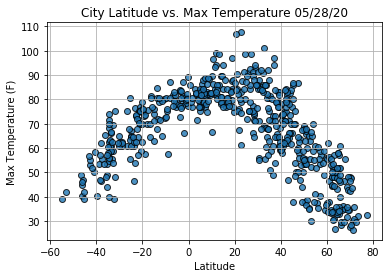

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

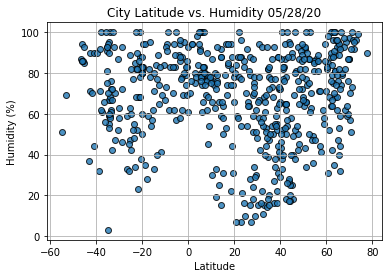

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

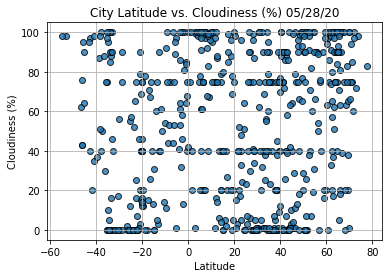

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

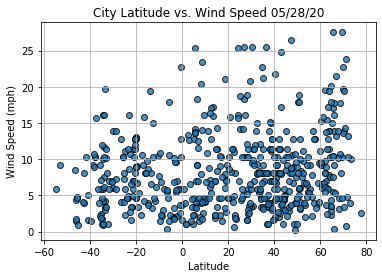

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [20]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                         Amga
Country                        RU
Date          2020-05-28 18:14:46
Lat                          60.9
Lng                        131.96
Max Temp                    37.71
Humidity                       85
Cloudiness                     97
Wind Speed                   5.97
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4       True
       ...  
565     True
566     True
567     True
568     True
569     True
Name: Lat, Length: 570, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Tura,IN,2020-05-28 18:14:15,25.52,90.22,71.76,92,3,4.41
2,Kurilsk,RU,2020-05-28 18:14:45,45.23,147.88,37.92,90,64,8.46
4,Norman Wells,CA,2020-05-28 18:11:53,65.28,-126.83,51.80,40,5,10.29
5,Yellowknife,CA,2020-05-28 18:11:35,62.46,-114.35,44.60,42,20,6.93
9,Nerja,ES,2020-05-28 18:14:46,36.76,-3.89,73.00,68,0,1.01
...,...,...,...,...,...,...,...,...,...
565,Santo Tomas,PH,2020-05-28 18:15:47,14.11,121.14,81.00,88,20,2.24
566,Priargunsk,RU,2020-05-28 18:15:47,50.37,119.10,54.95,87,98,8.14
567,Katsuura,JP,2020-05-28 18:11:58,35.13,140.30,63.00,72,75,9.17
568,Rawah,IQ,2020-05-28 18:15:47,34.48,41.91,92.12,18,60,22.75


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

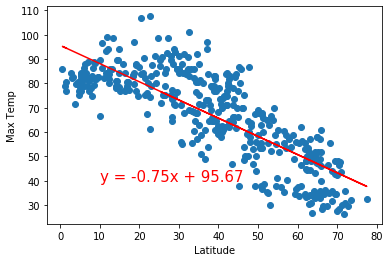

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for Maximum Temperature", "Max Temp", (10,40))

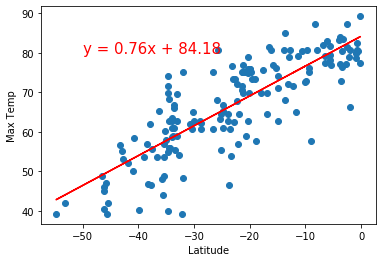

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,80))

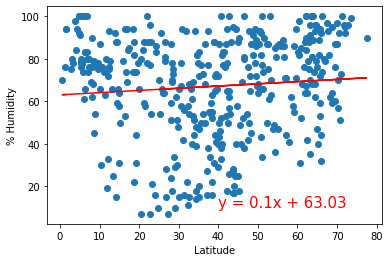

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

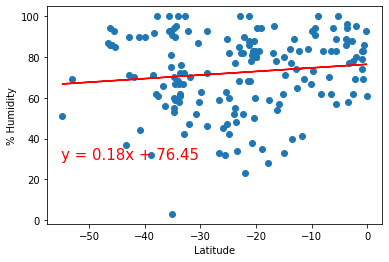

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-55,30))

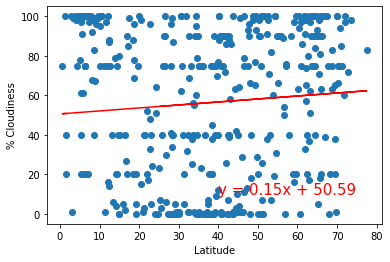

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

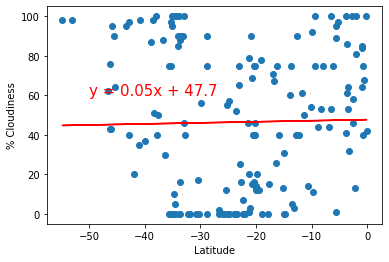

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

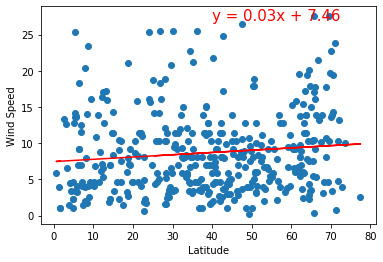

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,27))

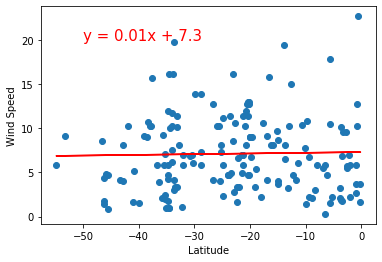

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,20))